## Введение в анализ данных, ИАД-3

## НИУ ВШЭ, 2019-20 учебный год

### Домашнее задание №1

Задание выполнил(а): Степанов Николай

### Общая информация

__Дата выдачи:__ 05.02.2020

__Дедлайн:__ 15.02.2020 23:59

### О задании

В этом домашнем задании вы попрактикуетесь в работе с библиотеками numpy, pandas и matplotlib, а в качестве бонусного задания сможете реализовать алгоритм KNN.

### Оценивание и штрафы

Каждая задача оценивается в 1 балл, за бонусную часть можно получить 1 балл.

Оценка за ДЗ вычисляется по следующей формуле:

$$
\left(\min(9, s_{\text{numpy}}) + \min(12, s_{\text{pandas}})\right) \times 10 / 21,
$$

где $s_{\text{numpy}}$ и $s_{\text{pandas}}$ — количество баллов, которое вы набрали за соответствующую часть. Задач больше, чем необходимо сделать для получения полного балла за ДЗ — вы можете сделать те, которые вам больше нравятся, или сделать все, чтобы дополнительно потренироваться. Все баллы сверх обязательных (9 в первой части и 12 во второй) идут в бонус. Таким образом, за это домашнее задание можно получить 4 бонусных балла.

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 балл в день, но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/).

## Часть 1. Numpy

Для успешного выполнения этой части вам необходимо пройти все `assert`'ы.

In [1]:
import numpy as np

Во всех задачах необходимо написать код решения внутри функции и проверить его работу, вызвав функцию для данных из условия.

При решении задач запрещается использовать циклы (`for`, `while`) и оператор `if`.

Везде, где встречаются массивы или матрицы, подразумевается, что это `numpy.array`. 

### 1

Напишите функцию, возвращающую округленную взвешенную сумму оценок по данным оценкам и весам. Можете посчитать свою оценку за курс :) В нашем случае вес экзамена равен 0.3, вес домашек - 0.42, вес контрольной - 0.14, вес самостоятельных - 0.14. Например, если за экзамен у вас 7, за домашки 10, за контрольную 8, а за самостоятельные 6, то вы получите отличную оценку 8!

In [18]:
def result_mark(weights: np.array, marks: np.array) -> int:
    return int(sum(weights*marks))

In [19]:
weights = np.array([0.3, 0.42, 0.14, 0.14])
marks = np.array([7, 10, 8, 6])

assert result_mark(weights, marks) == 8

In [20]:
weights = np.array([0.3, 0.42, 0.14, 0.14])
marks = np.array([7, 0, 8, 6])

assert result_mark(weights, marks) == 4

### 2

Напишите функцию, меняющую каждое третье (начиная с 0) значение массива целых чисел на заданное число. Например, если на вход поступает массив `array([3, 5, 1, 0, -3, 22, 213436])` и число `-111`, то на выходе должен получиться массив `array([-111, 5, 1, -111, -3, 22, -111])`.

In [21]:
def change_array(array: np.array, number: int) -> np.array:
    array[::3] = number
    return array

In [22]:
array = np.array([3, 5, 1, 0, -3, 22, 213436])
number = -111
assert np.allclose(change_array(array, number), np.array([-111, 5, 1, -111, -3, 22, -111]))

In [23]:
array = np.array([3, 14, 15, 92, 6])
number = 8

assert np.allclose(change_array(array, number), np.array([8, 14, 15, 8, 6]))

### 3

Напишите функцию, выдающую индексы «близких» элементов заданных массивов, а именно тех пар элементов, чей модуль разницы не превосходит заданного значения. Например, если на вход поступают массив `array([1.5, 0.5, 2, -4.1, -3, 6, -1])`, массив `array([1.2, 0.5, 1, -4, 3, 0, -1.2])` и число `0.5`, то на выходе должен получиться массив `array([0, 1, 3, 6])` (_**важно: не `tuple`, а одномерный массив типа `numpy.ndarray` (то есть `.ndim` от него равно 1)!**_).

In [24]:
def find_close(array1: np.array, array2: np.array,
               precision: float) -> np.array:
    return np.where(np.absolute(array1-array2) < precision)[0]

In [25]:
array1 = np.array([1.5, 0.5, 2, -4.1, -3, 6, -1])
array2 = np.array([1.2, 0.5, 1, -4.0,  3, 0, -1.2])
precision = 0.5
res = find_close(array1, array2, precision)
assert res.ndim == 1
assert np.allclose(res, np.array([0, 1, 3, 6]))

In [26]:
array1 = np.array([3.1415, 2.7182, 1.6180, 6.6261])
array2 = np.array([6.6730, 1.3807, -1,     6.0222])
precision = 1.7
res = find_close(array1, array2, precision)

assert res.ndim == 1
assert np.allclose(res, np.array([1, 3]))

### 4

Напишите функцию, которая составляет блочную матрицу из четырех блоков, где каждый блок - это заданная матрица. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
\end{pmatrix},
$$
то ответом будет матрица
$$
\begin{pmatrix}
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
\end{pmatrix}
$$

In [27]:
def block_matrix(block: np.array) -> np.array:
    return np.block([ [block, block], [block, block] ])

In [28]:
block = np.array([[1, 3, 3], [7, 0, 0]])
print(block_matrix(block))
assert np.allclose(
    block_matrix(block),
    np.array([[1, 3, 3, 1, 3, 3],
              [7, 0, 0, 7, 0, 0],
              [1, 3, 3, 1, 3, 3],
              [7, 0, 0, 7, 0, 0]])
)

[[1 3 3 1 3 3]
 [7 0 0 7 0 0]
 [1 3 3 1 3 3]
 [7 0 0 7 0 0]]


### 5

Напишите функцию, вычисляющую произведение всех ненулевых диагональных элементов на диагонали данной квадратной матрицы. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
6 & 7 & 8\\
\end{pmatrix},
$$
то ответом будет 32.

Элементы матрицы считать целочисленными.

In [29]:
def diag_prod(matrix: np.array) -> int:
    return np.prod(np.delete(np.diag(matrix), 0))

In [30]:
matrix = np.array([[0, 1, 2, 3],
                   [4, 5, 6, 7],
                   [8, 9, 10, 11],
                   [12, 13, 14, 15]])

assert diag_prod(matrix) == 750

### 6

Для улучшения качества работы некоторых алгоритмов машинного обучения может быть полезно использовать [нормализацию данных](https://vk.cc/8xmfQk), чтобы привести признаки в выборке к одному масштабу — а именно, из каждого столбца вычесть среднее его значений и поделить на их стандартное отклонение. Напишите функцию, нормализующую входящую матрицу (по столбцам). Например, если на вход подается матрица 
$$
\begin{pmatrix}
1 & 4 & 4200\\
0 & 10 & 5000\\
1 & 2 & 1000\\
\end{pmatrix},
$$
то результатом с точностью до сотых будет матрица
$$
\begin{pmatrix}
0.71 & -0.39 & 0.46\\
-1.41 & 1.37 & 0.93\\
0.71 & -0.98 & -1.39\\
\end{pmatrix}
$$
Учтите, что в вашей матрице не должно получаться никаких nan. Подумайте, в каком случае они могут возникнуть и как обойти эту проблему.

_Подсказка. Казалось бы, при чем тут деление на ноль._

In [31]:
def normalize(matrix: np.array) -> np.array:
    return (matrix - np.mean(matrix, axis=0))/np.std(matrix, axis = 0)

In [32]:
matrix = np.array([[1, 4, 4200], [0, 10, 5000], [1, 2, 1000]])
print(normalize(matrix))
assert np.allclose(
    normalize(matrix),
    np.array([[ 0.7071, -0.39223,  0.46291],
              [-1.4142,  1.37281,  0.92582],
              [ 0.7071, -0.98058, -1.38873]])
)

[[ 0.70710678 -0.39223227  0.46291005]
 [-1.41421356  1.37281295  0.9258201 ]
 [ 0.70710678 -0.98058068 -1.38873015]]


In [33]:
matrix = np.array([[-7, 2, 42], [2, 10, 50], [5, 4, 10]])

assert np.allclose(
    normalize(matrix),
    np.array([[-1.37281, -0.98058,  0.46291],
              [ 0.39223,  1.37281,  0.92582],
              [ 0.98058, -0.39223, -1.38873]])
)

### 7

Напишите функцию, вычисляющую какую-нибудь первообразную данного полинома (в качестве константы возьмите $0$). Например, если на вход поступает массив коэффициентов `array([4, 6, 0, 1])`, что соответствует полиному $4x^3 + 6x^2 + 1$, на выходе получается массив коэффициентов `array([1, 2, 0, 1, -2])`, соответствующий полиному $x^4 + 2x^3 + x - 2$.

In [34]:
def antiderivative(coefs: np.array) -> np.array:
    return np.polyint(np.poly1d(coefs)).coef

In [35]:
coefs = np.array([4, 6, 0, 1])
print(antiderivative(coefs))
assert np.allclose(
    antiderivative(coefs),
    np.array([1., 2., 0., 1., 0.])
)

[1. 2. 0. 1. 0.]


In [36]:
coefs = np.array([1, 7, -12, 21, -6])

assert np.allclose(
    antiderivative(coefs),
    np.array([ 0.2, 1.75, -4., 10.5, -6., 0.])
)

### 8

Напишите функцию, делающую данную [треугольную матрицу](https://ru.wikipedia.org/wiki/%D0%A2%D1%80%D0%B5%D1%83%D0%B3%D0%BE%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D0%BC%D0%B0%D1%82%D1%80%D0%B8%D1%86%D0%B0) симметричной. Например, если на вход поступает матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
0 & 5 & 6 & 7\\
0 & 0 & 8 & 9\\
0 & 0 & 0 & 10\\
\end{pmatrix},
$$
то на выходе должна быть матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
2 & 5 & 6 & 7\\
3 & 6 & 8 & 9\\
4 & 7 & 9 & 10\\
\end{pmatrix}.
$$

In [37]:
def make_symmetric(matrix: np.array) -> np.array:
    return matrix.T + matrix - np.diag(matrix.diagonal())

In [38]:
matrix = np.array([[1, 2, 3, 4], [0, 5, 6, 7], [0, 0, 8, 9], [0, 0, 0, 10]])
print(make_symmetric(matrix))

[[ 1  2  3  4]
 [ 2  5  6  7]
 [ 3  6  8  9]
 [ 4  7  9 10]]


In [39]:
matrix = np.array([[1, 2, 3, 4], [0, 5, 6, 7], [0, 0, 8, 9], [0, 0, 0, 10]])

assert np.allclose(
    make_symmetric(matrix),
    np.array([[ 1,  2,  3,  4],
              [ 2,  5,  6,  7],
              [ 3,  6,  8,  9],
              [ 4,  7,  9, 10]])
)

In [40]:
matrix = np.array([[10, 21, 32, 49], [0, 53, 62, 78], [0, 0, 82, 92], [0, 0, 0, 10]])

assert np.allclose(
    make_symmetric(matrix),
    np.array([[10, 21, 32, 49],
              [21, 53, 62, 78],
              [32, 62, 82, 92],
              [49, 78, 92, 10]])
)

### 9

Напишите функцию, создающую прямоугольную матрицу из m одинаковых строк, заполненных последовательными натуральными числами от a до b включительно в возрастающем порядке. Например, если m = 5, a = 3, b = 10, то на выходе будет матрица
$$
\begin{pmatrix}
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
\end{pmatrix}
$$

In [41]:
def construct_matrix(m: int, a: int, b: int) -> np.array:
    return np.zeros((m, b-a+1)) + np.arange(a, b+1)

In [42]:
m = 5
a = 3
b = 10

construct_matrix(m, a, b)

array([[ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]])

In [43]:
m = 5
a = 3
b = 10

assert np.allclose(
    construct_matrix(m, a, b),
    np.array([[ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10]])
)

In [44]:
m = 3
a = 2
b = 6

assert np.allclose(
    construct_matrix(m, a, b),
    np.array([[2, 3, 4, 5, 6],
              [2, 3, 4, 5, 6],
              [2, 3, 4, 5, 6]])
)

### 10

Напишите функцию, вычисляющую [косинусную близость](https://en.wikipedia.org/wiki/Cosine_similarity) двух векторов. Например, если на вход поступают вектора `array([-2, 1, 0, -5, 4, 3, -3])` и `array([0, 2, -2, 10, 6, 0, 0])`, ответом будет -0.25.

In [45]:
def cosine_similarity(vec1: np.array, vec2: np.array) -> float:
    return sum(vec1*vec2)/(np.linalg.norm(vec1)*np.linalg.norm(vec2))


In [46]:
vec1 = np.array([-2, 1,  0, -5, 4, 3, -3])
vec2 = np.array([ 0, 2, -2, 10, 6, 0,  0])

assert np.allclose(cosine_similarity(vec1, vec2), -0.25)

In [47]:
vec1 = np.array([-4, 2,  9, -8, 9, 0, -2])
vec2 = np.array([ 3, 2, -4, -1, 3, 2,  2])

assert np.allclose(cosine_similarity(vec1, vec2), -0.119929)

## Часть 2. Pandas и Matplotlib

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

В этой части домашнего задания вы поработаете с данными о пассажирах с затонувшего «Титаника». Описание данных:

https://www.kaggle.com/c/titanic/data

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

Интересный DashBoard: 
https://www.thinglink.com/scene/906464908143493121?buttonSource=viewLimits

### 11

Откройте в ноутбуке файл с данными ("train.csv"). Какой размер имеет таблица? Выведите первые 5 и последние 5 строк.

In [3]:
data = pd.read_csv('train1.csv')

In [4]:
print('Размер таблицы: {} x {}'.format(data.shape[0], data.shape[1]))
print('Первые пять строк:')
data.head(5)

Размер таблицы: 891 x 12
Первые пять строк:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print('Последние пять строк:')
data.tail(5)

Последние пять строк:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### 12

Для каждого из признаков укажите его тип (вещественный, категориальный, порядковый, другое). Придумайте три задачи, которые можно было бы решать для данного датасета — задачу регрессии, задачу классификации и задачу кластеризации.

PassengerId - вещественный,
Survived - бинарный,
Pclass - категориальный,
Name - номинальный,
Sex - категориальный,
Age - вещественный,
SibSp - вещественный,
Parch - вещественный,
Ticket - вещественный,
Fare - вещественный,
Cabin - категориальный (если сравнивать по буквам),
Embarked - категориальный

Задача регрессии - построить зависимость возраста, количества родственников и детей на борту от цены за билет
Задача классификации - по входным данным предсказать выживет пассажир или нет
Задача кластеризации - кластеризовать людей по Pclass в зависимости от age

In [6]:
print('Типы данных: \n{}'.format(data.dtypes))
data.describe()

Типы данных: 
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 13

Какова доля выживших после крушения пассажиров? Какова доля мужчин и женщин среди выживших?

In [7]:
print('Доля выживших: {:.3}'.format(data['Survived'].mean()))
print('Доля выживших мужчин {:.3}'.format(data[(data['Sex'] == 'male') & (data['Survived'] == 1)].shape[0]/data.shape[0]))
print('Доля выживших женщин {:.3}'.format(data[(data['Sex'] == 'female') & (data['Survived'] == 1)].shape[0]/data.shape[0]))

Доля выживших: 0.384
Доля выживших мужчин 0.122
Доля выживших женщин 0.262


### 14

Сколько пассажиров ехало в каждом классе? Кого было больше в самом многолюдном классе — мужчин или женщин?

In [8]:
print('Типы классов: {}'.format(data['Pclass'].unique()))
print('Количество людей в 3 классе: {}'.format(data[data['Pclass'] == 3].shape[0]))
print('Количество людей в 1 классе: {}'.format(data[data['Pclass'] == 1].shape[0]))
print('Количество людей во 2 классе: {}'.format(data[data['Pclass'] == 2].shape[0]))

Типы классов: [3 1 2]
Количество людей в 3 классе: 491
Количество людей в 1 классе: 216
Количество людей во 2 классе: 184


In [9]:
print('Мужчин в 3 классе: {} \nЖенщин в 3 классе: {}'.format((data[ (data['Pclass'] == 3) & (data['Sex'] == 'male') ].shape[0]),
                                                             (data[ (data['Pclass'] == 3) & (data['Sex'] == 'female') ].shape[0])))

Мужчин в 3 классе: 347 
Женщин в 3 классе: 144


### 15

Выведите минимальную, среднюю и максимальную сумму, которую заплатили пассажиры за проезд. Проделайте то же самое только для тех пассажиров, которые сели на корабль в Саутгемптоне. Выведите гистограммы, показывающие распределения стоимостей билетов в зависимости от места посадки.

In [10]:
print('Минимальная сумма проезда: {:.4}'.format(data['Fare'].min()))
print('Максимальная сумма проезда: {:.4}'.format(data['Fare'].max()))
print('Средняя стоимость проезда: {:.4}'.format(data['Fare'].mean()))

Минимальная сумма проезда: 0.0
Максимальная сумма проезда: 512.3
Средняя стоимость проезда: 32.2


In [11]:
print('Для пассажиров, севших в Саутгемптоне:')
print('Минимальная сумма проезда: {:.4}'.format(data[data['Embarked'] == 'S']['Fare'].min()))
print('Максимальная сумма проезда: {:.4}'.format(data[data['Embarked'] == 'S']['Fare'].max()))
print('Средняя стоимость проезда: {:.4}'.format(data[data['Embarked'] == 'S']['Fare'].mean()))

Для пассажиров, севших в Саутгемптоне:
Минимальная сумма проезда: 0.0
Максимальная сумма проезда: 263.0
Средняя стоимость проезда: 27.08


In [12]:
print('Порты посадки: {}'.format(data['Embarked'].unique()))

Порты посадки: ['S' 'C' 'Q' nan]


Text(0.5, 1.0, 'Distr. of ticket prices depending on the fare')

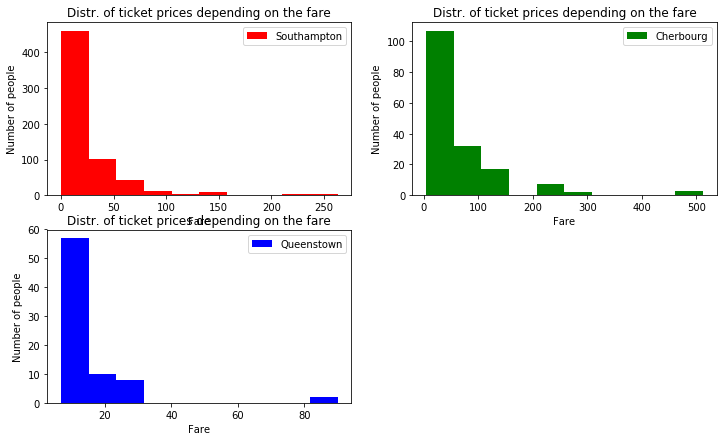

In [13]:
plt.figure(figsize=(12,7))
plt.subplot(221)
plt.hist(data[data['Embarked'] == 'S']['Fare'], bins = 10, color = 'r', label = 'Southampton')
plt.legend()
plt.ylabel('Number of people')
plt.xlabel('Fare')
plt.title('Distr. of ticket prices depending on the fare')

plt.subplot(222)
plt.hist(data[data['Embarked'] == 'C']['Fare'], bins = 10, color = 'g', label = 'Cherbourg')
plt.legend()
plt.ylabel('Number of people')
plt.xlabel('Fare')
plt.title('Distr. of ticket prices depending on the fare')

plt.subplot(223)
plt.hist(data[data['Embarked'] == 'Q']['Fare'], bins = 10, color = 'b', label = 'Queenstown')
plt.legend()
plt.ylabel('Number of people')
plt.xlabel('Fare')
plt.title('Distr. of ticket prices depending on the fare')

### 16

Все ли признаки несут в себе полезную информацию? Почему? Избавьтесь от ненужных столбцов.

#####  Никакой информации не несут такие признаки как: PassengerId, Name, Ticket. Потому что эти данные описывают объекты, но не показывают разницу между ними, т.е. Id, имя, порт из которого отправился пассажир и номер билета - не повлияет на то, выживет человек или нет при катастрофе
##### Признак Name оставил для следующих заданий

In [14]:
data = data.drop(columns=['PassengerId', 'Ticket'])

### 17

Есть ли в данных пропуски? Если да, то в каких столбцах? Сколько пропусков в каждом из них?

In [15]:
print('В данных пропуски есть?', data.isnull().any().any())
print('\nПропуски по столбцам:')
print(data.isnull().any())

В данных пропуски есть? True

Пропуски по столбцам:
Survived    False
Pclass      False
Name        False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
Cabin        True
Embarked     True
dtype: bool


In [16]:
print('Пропусков в Age: {}'.format(data['Age'].isnull().sum()))
print('Пропусков в Cabin: {}'.format(data['Cabin'].isnull().sum()))
print('Пропусков в Embarked: {}'.format(data['Embarked'].isnull().sum()))

Пропусков в Age: 177
Пропусков в Cabin: 687
Пропусков в Embarked: 2


### 18

Подумайте, как стоит заполнить пропуски в каждом столбце в зависимости от его типа, и сделайте это. Проверьте, что пропусков нигде не осталось.

In [17]:
# Пропуски в Age заполняем медианым значнием возраста
data['Age'].fillna(data['Age'].median(), inplace=True)

# Два пропуска в Embarked заполним предыдущим значением
data[data['Embarked']==""] = np.NaN
data['Embarked'].fillna(method='ffill', inplace=True)

# Пропуски в Cabin заполняем исходя из класса и цены за билет: для первого класса делаем примерно равное распределение по Cabin
# Для второго класса стоимость билетов больше 20 отдается за билет типа E..., меньше 20 за билет типа G...
# Для третьего класса стоимость билетов больше 10 отдается за билет типа G..., меньше 10 за билет типа F...
data.loc[(data['Pclass'] == 1) & (pd.isnull(data['Cabin']))  & (data['Fare'] <= 50), 'Cabin'] = 'A'
data.loc[(data['Pclass'] == 1) & (pd.isnull(data['Cabin']))  & (data['Fare'] > 50) & (data['Fare'] <= 150), 'Cabin'] = 'B'
data.loc[(data['Pclass'] == 1) & (pd.isnull(data['Cabin']))  & (data['Fare'] > 150), 'Cabin'] = 'C'
data.loc[(data['Pclass'] == 2) & (pd.isnull(data['Cabin'])) & (data['Fare'] > 20), 'Cabin'] = 'E'
data.loc[(data['Pclass'] == 2) & (pd.isnull(data['Cabin'])) & (data['Fare'] > 15) & (data['Fare'] <= 20), 'Cabin'] = 'D'
data.loc[(data['Pclass'] == 2) & (pd.isnull(data['Cabin'])) & (data['Fare'] <= 15), 'Cabin'] = 'F'
data.loc[(data['Pclass'] == 3) & (pd.isnull(data['Cabin'])) & (data['Fare'] > 10), 'Cabin'] = 'G'
data.loc[(data['Pclass'] == 3) & (pd.isnull(data['Cabin'])) & (data['Fare'] <= 10), 'Cabin'] = 'F'

In [18]:
print('В данных пропуски есть?', data.isnull().any().any())
print('\nПропуски по столбцам:')
print(data.isnull().any())

В данных пропуски есть? False

Пропуски по столбцам:
Survived    False
Pclass      False
Name        False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Cabin       False
Embarked    False
dtype: bool


### 19

Посчитайте, насколько сильно коррелируют друг с другом цена за билет и возраст пассажиров. Также проверьте наличие этой зависимости визуально (в этом вам поможет построение [диаграммы рассеяния](https://ru.wikipedia.org/wiki/%D0%94%D0%B8%D0%B0%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B0_%D1%80%D0%B0%D1%81%D1%81%D0%B5%D1%8F%D0%BD%D0%B8%D1%8F)).

In [19]:
data.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


In [20]:
print('Корреляция между ценой за билет и возрастом пассажиров: 0.096688')

Корреляция между ценой за билет и возрастом пассажиров: 0.096688


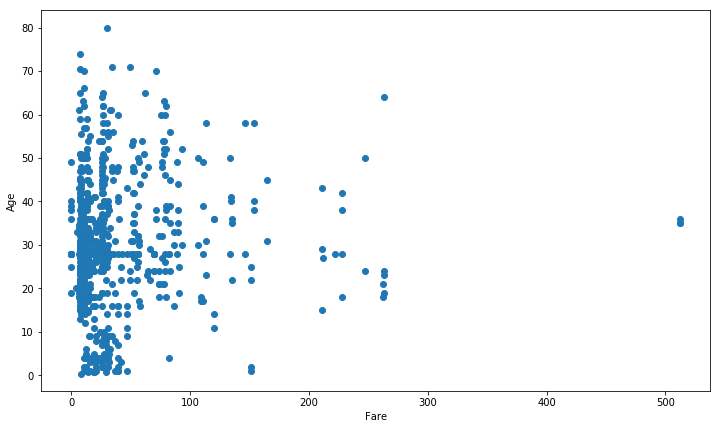

In [21]:
plt.figure(figsize=(12,7))
plt.plot(data['Fare'], data['Age'], linestyle='none', marker='o')
plt.xlabel('Fare')
plt.ylabel('Age')

plt.show()

### 20

Правда ли, что чаще выживали пассажиры с более дорогими билетами? А есть ли зависимость выживаемости от класса?

In [22]:
print('Средняя стоимость билета: {:.3}'.format(data['Fare'].mean()))

print('Доля выживших, стоимость билета которы выше срденей: {:.3}'.format(data[ (data['Survived'] == 1) &
                                                                              (data['Fare'] >= data['Fare'].mean())].shape[0]/data[data['Survived'] == 1].shape[0]))
print('Доля выживших, стоимость билета которы ниже срденей: {:.3}'.format(data[ (data['Survived'] == 1) &
                                                                              (data['Fare'] < data['Fare'].mean())].shape[0]/data[data['Survived'] == 1].shape[0]))

Средняя стоимость билета: 32.2
Доля выживших, стоимость билета которы выше срденей: 0.368
Доля выживших, стоимость билета которы ниже срденей: 0.632


In [23]:
print('Доля выживших, находящихся в 1 классе: {:.3}'.format(data[ (data['Pclass'] == 1) & (data['Survived'] == 1)].shape[0]/
                                                           data[data['Survived'] == 1].shape[0]))
print('Доля выживших, находящихся во 2 классе: {:.3}'.format(data[ (data['Pclass'] == 2) & (data['Survived'] == 1)].shape[0]/
                                                           data[data['Survived'] == 1].shape[0]))
print('Доля выживших, находящихся в 3 классе: {:.3}'.format(data[ (data['Pclass'] == 3) & (data['Survived'] == 1)].shape[0]/
                                                           data[data['Survived'] == 1].shape[0]))

Доля выживших, находящихся в 1 классе: 0.398
Доля выживших, находящихся во 2 классе: 0.254
Доля выживших, находящихся в 3 классе: 0.348


Таким образом, выживших людей, стоимость билетов которых ниже средней - больше. Что касается зависимости класса от выживаемости, то как таковой зависимости нет - примерно одинаковый процент выживших из первого и третьего классов.

### 21

Создание новых признаков (feature engineering) является одним из основных средств улучшения качества работы алгоритмов машинного обучения на этапе обработки данных. Добавьте в таблицу столбец, который будет показывать, сколько родных плыло вместе с пассажиром на корабле, включая его самого. Затем придумайте свой признак, который может быть полезен для алгоритма (несет в себе какую-то информацию), и добавьте его в таблицу.

In [24]:
data['RelChMe'] = data['SibSp'] + data['Parch'] + 1
# RealFare говорит об истинной стоимости билета человека, т.к. некоторые пассажиры имеют билет на не кольких человек
data['RealFare'] = data['Fare']/data['RelChMe']
# CabinLocation показывает добротность расположения каюты. Умножается на 3.9 т.к.
# по статистике выше - выжило больше людей из первого класса, а имеенно 39%. Также 
# добавляем нормированную настоящую стоимость билета (RealFare), т.к. 
# чем выше стоимость билета в классе - тем лучше места (более приспособлены к эвакуации).
# Все это нормируем по количеству классов
data['CabinLocation'] = (3.9*(4-data['Pclass']) + data['RealFare']/10)/3

### 22

Придумайте какое-нибудь интересное задание на анализ предлагаемых данных и решите его. Например, какая фамилия была самой популярной на корабле?

##### Задание: пассажир у которго было максимальное количество детей, родственников на борту. А также, остались ли они в живых?

In [25]:
data[data['Parch'] == data['Parch'].max()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,RelChMe,RealFare,CabinLocation
678,0.0,3.0,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1.0,6.0,46.9,G,S,8.0,5.8625,1.495417


In [26]:
data[data['SibSp'] == data['SibSp'].max()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,RelChMe,RealFare,CabinLocation
159,0.0,3.0,"Sage, Master. Thomas Henry",male,28.0,8.0,2.0,69.55,G,S,11.0,6.322727,1.510758
180,0.0,3.0,"Sage, Miss. Constance Gladys",female,28.0,8.0,2.0,69.55,G,S,11.0,6.322727,1.510758
201,0.0,3.0,"Sage, Mr. Frederick",male,28.0,8.0,2.0,69.55,G,S,11.0,6.322727,1.510758
324,0.0,3.0,"Sage, Mr. George John Jr",male,28.0,8.0,2.0,69.55,G,S,11.0,6.322727,1.510758
792,0.0,3.0,"Sage, Miss. Stella Anna",female,28.0,8.0,2.0,69.55,G,S,11.0,6.322727,1.510758
846,0.0,3.0,"Sage, Mr. Douglas Bullen",male,28.0,8.0,2.0,69.55,G,S,11.0,6.322727,1.510758
863,0.0,3.0,"Sage, Miss. Dorothy Edith ""Dolly""",female,28.0,8.0,2.0,69.55,G,S,11.0,6.322727,1.510758


In [27]:
data = data.drop(columns=['Name', 'SibSp', 'Parch'])

Любопытно, что все они одного возраста

### 23

Постройте гистограммы распределения вещественных признаков. Есть ли в них разница? Чем это может быть плохо с точки зрения машинного обучения? Отнормируйте вещественные признаки и посмотрите, как изменилась ситуация.

Text(0.5, 1.0, 'Distr. of age')

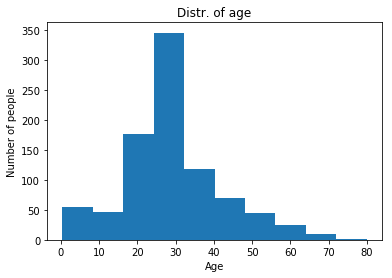

In [28]:
plt.hist(data['Age'], bins = 10)
plt.ylabel('Number of people')
plt.xlabel('Age')
plt.title('Distr. of age')

Text(0.5, 1.0, 'Distr. of RelChMe')

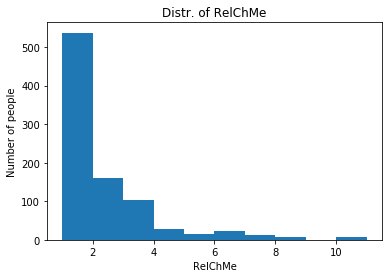

In [29]:
plt.hist(data['RelChMe'], bins = 10)
plt.ylabel('Number of people')
plt.xlabel('RelChMe')
plt.title('Distr. of RelChMe')

Text(0.5, 1.0, 'Distr. of RealFare')

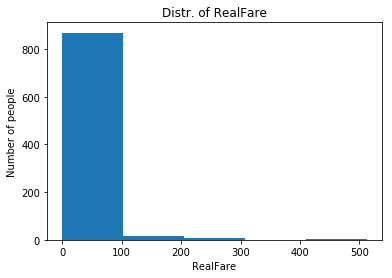

In [30]:
plt.hist(data['RealFare'], bins = 5)
plt.ylabel('Number of people')
plt.xlabel('RealFare')
plt.title('Distr. of RealFare')

Данные не отнормированы, что повлияет, например, на настройку коэффициентов в регрессионной модели, поэтому отнормируем их.

In [31]:
data['Age'] = (data['Age'] - data['Age'].mean())/data['Age'].std()
data['Fare'] = (data['Fare'] - data['Fare'].mean())/data['Fare'].std()

Text(0.5, 1.0, 'Distr. of age')

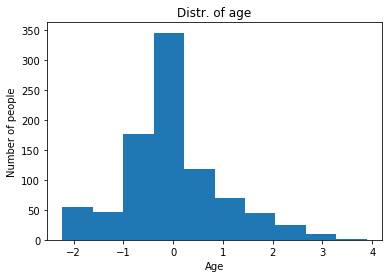

In [32]:
plt.hist(data['Age'], bins = 10)
plt.ylabel('Number of people')
plt.xlabel('Age')
plt.title('Distr. of age')

Text(0.5, 1.0, 'Distr. of RealFare')

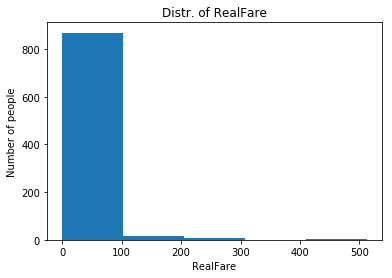

In [33]:
plt.hist(data['RealFare'], bins = 5)
plt.ylabel('Number of people')
plt.xlabel('RealFare')
plt.title('Distr. of RealFare')

### 24

Есть ли в данных категориальные признаки, которые принимают значения строк, а не чисел? Если да, то для многих алгоритмов машинного обучения это может стать серьезным препятствием, поэтому закодируйте категориальные признаки так, чтобы к данным можно было применить любые алгоритмы машинного обучения.

In [34]:
data = data.join(pd.get_dummies(data['Sex']))
data = data.drop(columns=['Sex'])

In [35]:
data.loc[((data['Cabin']).str.startswith('A') == True), 'Cabin'] = 'class_A'
data.loc[((data['Cabin']).str.startswith('B') == True), 'Cabin'] = 'class_B'
data.loc[((data['Cabin']).str.startswith('C') == True), 'Cabin'] = 'class_C'
data.loc[((data['Cabin']).str.startswith('D') == True), 'Cabin'] = 'class_D'
data.loc[((data['Cabin']).str.startswith('E') == True), 'Cabin'] = 'class_E'
data.loc[((data['Cabin']).str.startswith('F') == True), 'Cabin'] = 'class_F'
data.loc[((data['Cabin']).str.startswith('G') == True), 'Cabin'] = 'class_G'
data.loc[((data['Cabin']).str.startswith('T') == True), 'Cabin'] = 'class_T'

In [36]:
data = data.join(pd.get_dummies(data['Cabin']))
data = data.drop(columns=['Cabin'])

In [37]:
data = data.join(pd.get_dummies(data['Embarked']))
data = data.drop(columns=['Embarked'])

#### C помощью One Hot Encoding преобразовал категориальные признаки в вещественные

### Итоговый датасет

In [38]:
data = data.drop(columns=['Pclass', 'Fare', 'RealFare'])

In [39]:
data.corr()

,Survived,Age,RelChMe,CabinLocation,female,male,class_A,class_B,class_C,class_D,class_E,class_F,class_G,class_T,C,Q,S
Survived,1.000000,-0.064910,0.016639,0.321654,0.543351,-0.543351,-0.013905,0.193105,0.129013,0.172909,0.169886,-0.276052,-0.083071,-0.026456,0.171485,0.008660,-0.155660
Age,-0.064910,1.000000,-0.245619,0.275505,-0.081163,0.081163,0.163256,0.109205,0.119346,0.106075,0.049124,-0.051748,-0.270259,0.040285,0.032079,-0.021272,-0.014665
RelChMe,0.016639,-0.245619,1.000000,-0.096711,0.200988,-0.200988,-0.102811,-0.003544,0.027240,-0.009830,0.071101,-0.438487,0.548927,-0.018804,-0.047716,-0.060479,0.079977
CabinLocation,0.321654,0.275505,-0.096711,1.000000,0.142830,-0.142830,0.216139,0.451472,0.460656,0.182448,0.122662,-0.477317,-0.301602,0.037868,0.303904,-0.171935,-0.157610
female,0.543351,-0.081163,0.200988,0.142830,1.000000,-1.000000,-0.129998,0.129886,0.076844,0.090884,0.124973,-0.266549,0.122484,-0.024728,0.086546,0.079067,-0.125722
male,-0.543351,0.081163,-0.200988,-0.142830,-1.000000,1.000000,0.129998,-0.129886,-0.076844,-0.090884,-0.124973,0.266549,-0.122484,0.024728,-0.086546,-0.079067,0.125722
class_A,-0.013905,0.163256,-0.102811,0.216139,-0.129998,0.129998,1.000000,-0.055930,-0.057904,-0.046296,-0.076896,-0.194792,-0.098861,-0.006977,0.114538,-0.064472,-0.059609
class_B,0.193105,0.109205,-0.003544,0.451472,0.129886,-0.129886,-0.055930,1.000000,-0.074750,-0.059765,-0.099268,-0.251464,-0.127623,-0.009007,0.224119,-0.067384,-0.153744
class_C,0.129013,0.119346,0.027240,0.460656,0.076844,-0.076844,-0.057904,-0.074750,1.000000,-0.061874,-0.102771,-0.260338,-0.132127,-0.009325,0.131504,-0.055408,-0.080191
class_D,0.172909,0.106075,-0.009830,0.182448,0.090884,-0.090884,-0.046296,-0.059765,-0.061874,1.000000,-0.082168,-0.208147,-0.105639,-0.007455,0.095010,-0.068893,-0.039714


In [40]:
data.head()

,Survived,Age,RelChMe,CabinLocation,female,male,class_A,class_B,class_C,class_D,class_E,class_F,class_G,class_T,C,Q,S
0,0.0,-0.565419,2.0,1.420833,0,1,0,0,0,0,0,1,0,0,0,0,1
1,1.0,0.663488,2.0,5.088055,1,0,0,0,1,0,0,0,0,0,1,0,0
2,1.0,-0.258192,1.0,1.564167,1,0,0,0,0,0,0,1,0,0,0,0,1
3,1.0,0.433068,2.0,4.785000,1,0,0,0,1,0,0,0,0,0,0,0,1
4,0.0,0.433068,1.0,1.568333,0,1,0,0,0,0,0,1,0,0,0,0,1


# 3 KNN своими руками (Бонусное задание: 4 балла)

### 25
В этом задании вам предстоить реализовать метод KNN для задачи классификации. Перед вами интерфейс класса, который вам предстоить реализовать. От вас требуется реализовать методы:
* `__init__(self, n_neighbors)`
* `fit(self, X, y)`
* `predict(self, X)`
* `predict_proba(self, X)`

Все ближайшие соседи должны иметь одинаковые веса при построении предсказания. В качестве метрики используйте евклидово расстояние.

Для поиска ближайших соседей можно воспользоваться готовыми структурами данных из подмодуля `sklearn.neighors`, например `KDTree`. Структуры данных из этого подмодуля принимают на вход массив точек, а потом позволяют делать запросы и быстро находить ближайших соседей.

Для проверки работы вашей реализации примените алгоритм ближайших соседей на датасете из пункта 24.
Какие метрики качества у вас получаются? Сравните свои результаты с результатами KNN из библиотеки sklearn.

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [254]:
from sklearn.neighbors import KDTree
from sklearn.base import BaseEstimator

class MyNeighborsClassifier(BaseEstimator):
    def __init__(self, 
                 n_neighbors = 5, 
                 leaf_size = 30,
                 metric='minkowski',
                 p=2):
        super().__init__()
        self.n_neighbors = n_neighbors
        self.leaf_size = leaf_size
        self.metric = metric
        self.p = p

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def predict(self, X):
        y_pred = [self.predict_proba(x.reshape(1, -1)) for x in X]
        return np.array(y_pred)

    def predict_proba(self, X):
        tree = KDTree(self.X_train, leaf_size=self.leaf_size, metric=self.metric)
        dist, ind = tree.query(X.tolist(), k=self.n_neighbors)
        target_value = [self.y_train[i] for i in ind[0]]
        return max(set(target_value), key = target_value.count)

In [255]:
X = np.array(data.drop(columns=['Survived']))
y = np.array(data['Survived'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3)

In [256]:
MyKnn=MyNeighborsClassifier(n_neighbors=3)
MyKnn.fit(X_train, y_train)

In [257]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [263]:
print('Sklearn knn. Точность на обучении: ',accuracy_score(y_train, knn.predict(X_train)))
print('Sklearn knn. Точность на тесте: ', accuracy_score(y_test, knn.predict(X_test)))
print('MyKnn. Точность на обучении: ',accuracy_score(y_train, MyKnn.predict(X_train)))
print('MyKnn. Точность на тесте: ', accuracy_score(y_test, MyKnn.predict(X_test)))

Sklearn knn. Точность на обучении:  0.6934189406099518
Sklearn knn. Точность на тесте:  0.7126865671641791
MyKnn. Точность на обучении:  0.8764044943820225
MyKnn. Точность на тесте:  0.7835820895522388


In [265]:
sklearn_knn_train_accuracy = []
sklearn_knn_test_accuracy = []
for i in range(1, 301):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    sklearn_knn_train_accuracy.append(accuracy_score(y_train, knn.predict(X_train)))
    sklearn_knn_test_accuracy.append(accuracy_score(y_test, knn.predict(X_test)))

In [266]:
my_knn_train_accuracy = []
my_knn_test_accuracy = []
for i in range(1, 301):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    my_knn_train_accuracy.append(accuracy_score(y_train, MyKnn.predict(X_train)))
    my_knn_test_accuracy.append(accuracy_score(y_test, MyKnn.predict(X_test)))

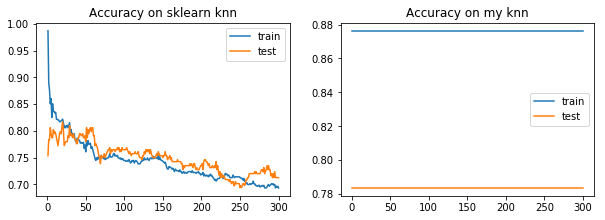

In [267]:
plt.figure(figsize=(10,7))

plt.subplot(221)
plt.plot(range(1, 301), sklearn_knn_train_accuracy, label = 'train')
plt.plot(range(1, 301), sklearn_knn_test_accuracy, label = 'test')
plt.title('Accuracy on sklearn knn')
plt.legend()

plt.subplot(222)
plt.plot(range(1, 301), my_knn_train_accuracy, label = 'train')
plt.plot(range(1, 301), my_knn_test_accuracy, label = 'test')
plt.title('Accuracy on my knn')
plt.legend()

##### Подбор числа соседей

In [270]:
sklearn_knn_gcv = GridSearchCV(knn, param_grid = {
    'n_neighbors': np.arange(1, 50)
})

In [271]:
sklearn_knn_gcv.fit(X_train, y_train)
sklearn_knn_gcv.best_params_

/home/nikstep/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'n_neighbors': 5}

In [273]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [274]:
print('Точность на обучении при лучшем параметре соседей: {:.3}'.format(accuracy_score(y_train, knn.predict(X_train))))
print('Точность на тесте при лучшем параметре соседей: {:.3}'.format(accuracy_score(y_test, knn.predict(X_test))))

Точность на обучении при лучшем параметре соседей: 0.86
Точность на тесте при лучшем параметре соседей: 0.795
